In [1]:
% pylab inline

from __future__ import print_function
import IPython
import scipy
import sklearn
import pandas as pd
import altair as alt

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Type = str(input("What is the type of molecule? "))
#print ("Type of molecule : ", Type)

In [3]:
#data=pd.read_csv('/Users/kanchan/Documents/data.csv')

Import Data

In [4]:
def potential(Type,X):
    data=pd.read_csv('/Users/kanchan/Documents/data.csv')
    
    df1=data.iloc[0:10]
    df2=data.iloc[10:]
    
    if Type=='A':
        df=df1
    else:
        df=df2
            
    x = df.values[:,1:10]
    y = df['E1'].values
    
   
    NoF=df['NoF'].values
    F=df['F'].values
    CF3=df['CF3'].values
    
    model = LinearRegression(normalize=True)  
    model.fit(x, y)
    
    y_fit = model.predict(X)
    
    return y_fit

In [5]:
target=array([[0,0,0,0,0,0,0,0,154],])
Ehalf=potential(Type,target)


NameError: name 'Type' is not defined

Extract Data

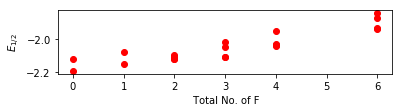

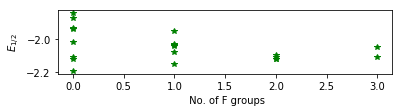

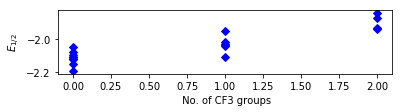

In [5]:
subplot(311)
plot(NoF,y,'or')
xlabel(' Total No. of F')
ylabel('$ E_{1/2}$')
show()

subplot(312)
plot(F,y,'g*')
xlabel(' No. of F groups')
ylabel('$ E_{1/2}$')

show()
subplot(313)
plot(CF3,y,'bD')
xlabel(' No. of CF3 groups')
ylabel('$ E_{1/2}$')
show()


In [6]:
#pandas.plotting.scatter_matrix(data,figsize=(15,15))

Regression using Sklearn and Statsmodels

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [10]:
results = smf.ols('E1 ~  FG1+ FG2 + FG3 +FG4 + FG5  + dist + NoF +F + CF3 ', data=data).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     E1   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     23.21
Date:                Thu, 17 May 2018   Prob (F-statistic):           4.54e-06
Time:                        15:18:22   Log-Likelihood:                 45.831
No. Observations:                  20   AIC:                            -75.66
Df Residuals:                      12   BIC:                            -67.70
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2552      0.041    -54.908      0.0

In [31]:
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

target=array([[0,0,0,0,0,0,0,0,154],])

linear_model.LinearRegression()
for item in classifiers:
    print(item)
    clf = item
    clf.fit(X, y)
    print(clf.predict(target),'\n')


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
[-2.09464287] 

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)
[-2.20410816] 

LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)
[-2.0465] 

ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, threshold_lambda=10000.0, tol=0.001, verbose=False)
[-2.16332295] 

PassiveAggressiveRegressor(C=1.0, average=False, epsilon=0.1,
              fit_intercept=True, loss='epsilon_insensitive',
              max_iter=None, n_iter=None, random_state=None,

/Users/kanchan/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[-2.18145784] 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[-2.18784526] 



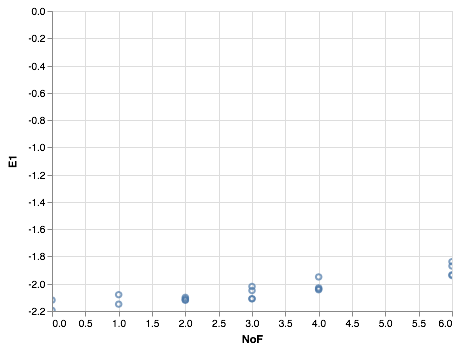

In [28]:
alt.Chart(data).mark_point().encode(
    x='NoF',
    y='E1',
    tooltip='identity'
    ).interactive() 

In [7]:
data=pd.read_csv('data.csv')
    
df1=data.iloc[0:10]
df2=data.iloc[10:]

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [9]:
results = smf.ols('E1 ~  FG1+ FG2 + FG3 +FG4 + FG5  + dist + NoF +F + CF3 ', data=data).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     E1   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     23.21
Date:                Fri, 18 May 2018   Prob (F-statistic):           4.54e-06
Time:                        10:06:59   Log-Likelihood:                 45.831
No. Observations:                  20   AIC:                            -75.66
Df Residuals:                      12   BIC:                            -67.70
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2552      0.041    -54.908      0.0

In [10]:
results1 = smf.ols('E1 ~  FG1+ FG2 + FG3 +FG4 + FG5  + dist + NoF +F + CF3 ', data=df1).fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                     E1   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     21.70
Date:                Fri, 18 May 2018   Prob (F-statistic):            0.00534
Time:                        10:07:14   Log-Likelihood:                 27.738
No. Observations:                  10   AIC:                            -43.48
Df Residuals:                       4   BIC:                            -41.66
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.176e-05   2.28e-07    -95.603      0.0

/Users/kanchan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [11]:
results2 = smf.ols('E1 ~  FG1+ FG2 + FG3 +FG4 + FG5  + dist + NoF +F + CF3 ', data=df2).fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                     E1   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     26.29
Date:                Fri, 18 May 2018   Prob (F-statistic):            0.00370
Time:                        10:07:26   Log-Likelihood:                 26.299
No. Observations:                  10   AIC:                            -40.60
Df Residuals:                       4   BIC:                            -38.78
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.207e-05   1.08e-06    -85.362      0.0

/Users/kanchan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [12]:
results3 = smf.ols('E2 ~  FG1+ FG2 + FG3 +FG4 + FG5  + dist + NoF +F + CF3 + E1', data=df1).fit()

print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                     E2   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     19.58
Date:                Fri, 18 May 2018   Prob (F-statistic):             0.0167
Time:                        10:07:47   Log-Likelihood:                 28.513
No. Observations:                  10   AIC:                            -43.03
Df Residuals:                       3   BIC:                            -40.91
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.477e-06   1.16e-05      0.213      0.8

/Users/kanchan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [13]:
results4 = smf.ols('E2 ~  FG1+ FG2 + FG3 +FG4 + FG5  + dist + NoF +F + CF3 + E1', data=df2).fit()

print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                     E2   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     1.252
Date:                Fri, 18 May 2018   Prob (F-statistic):              0.462
Time:                        10:08:02   Log-Likelihood:                 8.8993
No. Observations:                  10   AIC:                            -3.799
Df Residuals:                       3   BIC:                            -1.681
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0002      0.000     -0.712      0.5

/Users/kanchan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [24]:
results1.rsquared

0.96444209244331

In [25]:
results5 = smf.ols('E3 ~  FG1+ FG2 + FG3 +FG4 + FG5  + dist + NoF +F + CF3 + E1+E2', data=df2).fit()

print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:                     E3   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1283.
Date:                Fri, 18 May 2018   Prob (F-statistic):           0.000779
Time:                        10:19:48   Log-Likelihood:                 44.636
No. Observations:                  10   AIC:                            -73.27
Df Residuals:                       2   BIC:                            -70.85
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.995e-05   1.13e-05      7.993      0.0

/Users/kanchan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [26]:
results6 = smf.ols('E3 ~  FG1+ FG2 + FG3 +FG4 + FG5  + dist + NoF +F + CF3 + E1+E2', data=df1).fit()

print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:                     E3   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     4.190
Date:                Fri, 18 May 2018   Prob (F-statistic):              0.206
Time:                        10:20:12   Log-Likelihood:                 22.323
No. Observations:                  10   AIC:                            -28.65
Df Residuals:                       2   BIC:                            -26.23
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.786e-06   2.66e-05      0.142      0.9

/Users/kanchan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [27]:
results7 = smf.ols('E3 ~  FG1+ FG2 + FG3 +FG4 + FG5  + dist + NoF +F + CF3 + E1+E2', data=data).fit()

print(results7.summary())

                            OLS Regression Results                            
Dep. Variable:                     E3   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     14.22
Date:                Fri, 18 May 2018   Prob (F-statistic):           0.000138
Time:                        10:20:32   Log-Likelihood:                 34.258
No. Observations:                  20   AIC:                            -48.52
Df Residuals:                      10   BIC:                            -38.56
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5376      1.280      0.420      0.6

In [28]:
results8 = smf.ols('E2 ~  FG1+ FG2 + FG3 +FG4 + FG5  + dist + NoF +F + CF3 + E1', data=data).fit()

print(results8.summary())

                            OLS Regression Results                            
Dep. Variable:                     E2   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     3.468
Date:                Fri, 18 May 2018   Prob (F-statistic):             0.0300
Time:                        10:22:43   Log-Likelihood:                 20.679
No. Observations:                  20   AIC:                            -23.36
Df Residuals:                      11   BIC:                            -14.40
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7618      2.396     -0.318      0.7